<h1>Continuous Assessment: Predicting the price of cars in the Sri Lankan market </h1>

<h1>Initialization</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from joblib import dump

<h1>Data cleaning for Sri Lankan Car Sales Prices Dataset</h1>

In [3]:
#Using pandas I am reading in the data from the CSV into a DataFrame
df = pd.read_csv("C:/Users/Andrei/Desktop/University/Year 3 Semester 2/Intelligent Systems/1stProject/dataset_vehicles.csv")

#Shuffling the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [4]:
#Take a look at the dimensions of the dataset
df.shape

(18938, 19)

In [5]:
#Take a look at the columns of the dataset
df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

In [6]:
#Take a look at the datatypes of the columns
df.dtypes

Title             object
Sub_title         object
Price             object
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity          object
Mileage           object
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

In [7]:
#Check a few rows
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Fit Shuttle Full Option 2015 for sale,"Posted on 30 May 2:39 pm, Alutgama, Kalutara","Rs 5,600,000",Honda,Fit Shuttle,Full Option,2015,Used,Automatic,Station wagon,Hybrid,"1,490 cc","107,222 km","Alutgama, Kalutara","HONDA FIT SHUTTLE GP7Rs. 5,600,000/= (Negotiab...",https://ikman.lk/en/ad/honda-fit-shuttle-full-...,kasun,Premium-Member,2021-05-30 14:39:00
1,Kia Sorento 1 to 12 tan premium 2011 for sale,"Posted on 18 Jun 4:01 pm, Horana, Kalutara","Rs 9,800,000",Kia,Sorento,1 to 12 tan premium,2011,Used,Automatic,SUV / 4x4,Diesel,"2,200 cc","114,586 km","Horana, Kalutara",sorento tan primium 1 -12 option engineer used...,https://ikman.lk/en/ad/kia-sorento-1-to-12-tan...,Thilina Chamara,Premium-Member,2021-06-18 16:01:00
2,Suzuki Estilo Zen 2010 for sale,"Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurune...","Rs 2,175,000",Suzuki,Estilo,Zen Estilo,2010,Used,Manual,Hatchback,Petrol,"1,000 cc","134,000 km","Kuliyapitiya, Kurunegala",New Tyres... New Battery ...Power Shutters..Po...,https://ikman.lk/en/ad/suzuki-estilo-zen-2010-...,Malith Welandage,Premium-Member,2021-03-17 15:19:00
3,Micro MX 7 Mark 2 2013 for sale,"Posted on 24 Jul 5:40 pm, Kottawa, Colombo","Rs 2,350,000",Micro,MX 7,Mark 2,2013,Used,Manual,Saloon,Petrol,"1,500 cc","45,000 km","Kottawa, Colombo",Motor CarRegistered on 2013 December First Owner,https://ikman.lk/en/ad/micro-mx-7-mark-2-2013-...,Ravi Hettiarachchi,Premium-Member,2021-07-24 17:40:00
4,Toyota Harrier LEXUS 2002 for sale,"Posted on 23 Jul 8:32 pm, Negombo, Gampaha","Rs 5,390,000",Toyota,Harrier,LEXUS,2002,Used,Automatic,SUV / 4x4,Petrol,"2,000 cc","170,000 km","Negombo, Gampaha",20023RD OWNERTOYOTA COMPANY MAINTAIN LEATHER E...,https://ikman.lk/en/ad/toyota-harrier-lexus-20...,NIROSHAN MOTOR TRADERS,Premium-Member,2021-07-23 20:32:00


In [8]:
#Get statistics about the data
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18938,18938,18938,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938,18938,18938,18938,18938,18938
unique,10329,17014,1831,57,516,6336,NaN,3,4,7,6,432,3850,198,17075,17911,6103,1,15060
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo","Rs 650,000",Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/toyota-pixis-g-intelige...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,92,5762,962,172,NaN,17991,11412,6712,13823,3861,450,1333,151,4,512,18938,69
mean,NaN,NaN,NaN,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the start we can see that we have to do quite a bit of data processing before we can get to actually predicting the price of cars.

First and foremost, we are trying to predict the price, but the column Price is of type object(string), meaning we can't do regression on it, unless we for some reason one hot encode every price, which wouldn't be logical. Therefore, we have to convert the prices to int. Aside from the Price column, there also seem to be more columns that will have to be converted to int, like Mileage and Capacity.

<h1>1.Price column</h1>

Price is the value that we are trying to predict so we should check if there are any nans in the csv file. In this case there aren't, so we can go ahead and convert the prices from the currency model to an int value.

In [9]:
df["Price"].isnull().values.any()

False

<h1>Convert Price to numerical value</h1>

To convert a price from "Rs 650,000" to "650000" of type int, I used a regex I found in a youtube tutorial:
https://www.youtube.com/watch?v=ox_AHkeqNJ0
This regex replaces every character that isn't a digit with '', it basically deletes that character. Then it converts the resulting value to int.

In [10]:
df["Price"] = pd.to_numeric(df["Price"].replace('[^0-9]','',regex=True))

In [11]:
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18938,18938,1.893800e+04,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938,18938,18938,18938,18938,18938
unique,10329,17014,NaN,57,516,6336,NaN,3,4,7,6,432,3850,198,17075,17911,6103,1,15060
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo",NaN,Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/toyota-pixis-g-intelige...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,NaN,5762,962,172,NaN,17991,11412,6712,13823,3861,450,1333,151,4,512,18938,69
mean,NaN,NaN,6.419971e+06,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.597758e+06,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.900000e+02,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.250000e+06,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.990000e+06,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.895000e+06,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


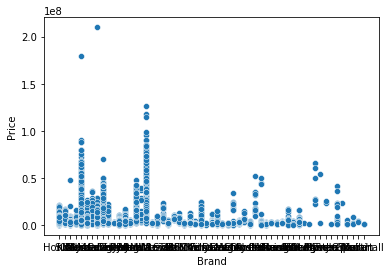

In [12]:
#Make a plot to see if there are price values that seem to be off
plot = scatterplot(x="Brand", y="Price", data=df)

In [13]:
#Take a look at the cars that have prices that look off
df[df["Price"]>80000000]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
583,Toyota Premio 1st owner 2020 for sale,"Posted on 25 Jul 6:36 am, Nattandiya, Puttalam",179000000,Toyota,Premio,1st owner 2020,2020,Used,Automatic,Saloon,Petrol,"1,500 cc","18,000 km","Nattandiya, Puttalam",Toyota Premio G SuperiorManufacture Year 2020E...,https://ikman.lk/en/ad/toyota-premio-1st-owner...,HRN Communications,Premium-Member,2021-07-25 06:36:00
5287,Land Rover Range LW Autobiography 2019 for sale,"Posted on 02 Aug 8:44 am, Rajagiriya, Colombo",90000000,Land Rover,Range Rover,LW Autobiography,2019,Reconditioned,Tiptronic,SUV / 4x4,Petrol,"2,000 cc","19,000 km","Rajagiriya, Colombo",Range Rover Long Wheel Autobiography 2019Brand...,https://ikman.lk/en/ad/land-rover-range-lw-aut...,Sell Fast | Jayasilu Bookshop,Premium-Member,2021-08-02 08:44:00
7155,Land Rover Range LWB AB UNREGISTERED 2019 for ...,"Posted on 23 Jul 10:07 pm, Colombo 3, Colombo",95000000,Land Rover,Range Rover,LWB AB UNREGISTERED,2019,New,Tiptronic,SUV / 4x4,Petrol,"2,000 cc",0 km,"Colombo 3, Colombo",RANGE ROVER LWB AUTOBIOGRAPHY - COMFORT PACKAG...,https://ikman.lk/en/ad/land-rover-range-lwb-ab...,Benson Motors,Premium-Member,2021-07-23 22:07:00
9227,Mitsubishi Montero GLS 2015 for sale,"Posted on 01 Jul 1:38 pm, Nittambuwa, Gampaha",210000000,Mitsubishi,Montero,GLS,2015,Used,Automatic,SUV / 4x4,Diesel,"3,200 cc","80,000 km","Nittambuwa, Gampaha","First owner, Leather seat, Electric srat, Rock...",https://ikman.lk/en/ad/mitsubishi-montero-gls-...,Ranaweera Enterprises,Premium-Member,2021-07-01 13:38:00
10512,Land Rover Range Autobiography LWB 2019 for sale,"Posted on 02 Jul 6:45 am, Colombo 4, Colombo",85000000,Land Rover,Range Rover,Autobiography LWB,2019,Reconditioned,Automatic,SUV / 4x4,Petrol,"2,000 cc","2,000 km","Colombo 4, Colombo",Land rover range rover autobiography LWB P400e...,https://ikman.lk/en/ad/land-rover-range-autobi...,Mannapperuma Traders (Pvt) Ltd,Premium-Member,2021-07-02 06:45:00
10679,Land Rover Range SV Autobiography 2019 for sale,"Posted on 25 Jul 9:43 am, Ja-Ela, Gampaha",126500000,Land Rover,Range Rover,SV Autobiography,2019,New,Automatic,SUV / 4x4,Petrol,"2,000 cc",200 km,"Ja-Ela, Gampaha",Range Rover SV Autobiography Fully LoadedHighe...,https://ikman.lk/en/ad/land-rover-range-sv-aut...,Gayuki Holdings (Pvt) Ltd,Premium-Member,2021-07-25 09:43:00
11729,Land Rover Range LWB Comfort Plus F/L 2019 for...,"Posted on 09 Aug 3:02 pm, Kohuwala, Colombo",81500000,Land Rover,Range Rover,LWB Comfort Plus F/L,2019,Used,Automatic,SUV / 4x4,Petrol,"2,000 cc","17,000 km","Kohuwala, Colombo",Land rover Range Rover P400 2018/12--MAXIMUM L...,https://ikman.lk/en/ad/land-rover-range-lwb-co...,R.A Lanka Motors,Premium-Member,2021-08-09 15:02:00
12825,Land Rover Range 2020 for sale,"Posted on 26 Mar 12:22 pm, Kohuwala, Colombo",118000000,Land Rover,Range Rover,NaN,2020,New,Automatic,SUV / 4x4,Diesel,"2,000 cc",0 km,"Kohuwala, Colombo",Range Rover SV 2020 with all options,https://ikman.lk/en/ad/land-rover-range-2020-f...,A R A Enterprises,Premium-Member,2021-03-26 12:22:00
14244,Toyota Land Cruiser Sahara VX V8 2020 for sale,"Posted on 02 Jul 10:33 pm, Boralesgamuwa, Colombo",88000000,Toyota,Land Cruiser Sahara,VX V8,2020,New,Tiptronic,MPV,Diesel,"4,600 cc",0 km,"Boralesgamuwa, Colombo",2020 Toyota Landcruiser V8 VXââââ BRAN...,https://ikman.lk/en/ad/toyota-land-cruiser-sah...,Irahanda Trading,Premium-Member,2021-07-02 22:33:00
14403,Toyota Land Cruiser Sahara VX V8 2020 for sale,"Posted on 16 Jul 4:44 pm, Boralesgamuwa, Colombo",90000000,Toyota,Land Cruiser Sahara,VX V8,2020,New,Tiptronic,SUV / 4x4,Diesel,"4,600 cc",0 km,"Boralesgamuwa, Colombo",2020 Toyota Landcruiser V8 VXââââ BRAN...,https://ikman.lk/en/ad/toyota-land-cruiser-sah...,Irahanda Trading,Premium-Member,2021-07-16 16:44:00


Indeed, these seem to be mistakes so I will delete them

In [14]:
df = df.drop(df[(df["Price"]>80000000)].index)

<h1>2.Brand & Model Columns</h1>

In [15]:
#Check if there are any missing values in the Brand column
df["Brand"].isnull().values.any()

False

In [16]:
#Check if there are any missing values in the Model column
df["Model"].isnull().values.any()

False

If we look in the data, there are a few cars that have the brand set as "Other brand" and model set as "Other model". We could try to split the title as to be able to fill those two columns, but the title could be in another "format" or have spelling mistakes, so i chose to delete those cars, as there weren't that many to begin with.

In [17]:
df["Brand"].unique()

array(['Honda', 'Kia', 'Suzuki', 'Micro', 'Toyota', 'Nissan', 'Audi',
       'Mitsubishi', 'Mercedes Benz', 'Peugeot', 'Zotye', 'Daihatsu',
       'Hyundai', 'Perodua', 'BMW', 'Jaguar', 'Land Rover',
       'Maruti Suzuki', 'Mazda', 'Lexus', 'Tata', 'MG', 'DFSK', 'Proton',
       'Mini', 'Chery', 'Ford', 'Citroen', 'Isuzu', 'Volkswagen',
       'Daewoo', 'Datsun', 'Volvo', 'Mahindra', 'Chrysler', 'Austin',
       'Porsche', 'Other brand', 'Morris', 'Chevrolet', 'Maruti',
       'Renault', 'Ssang Yong', 'Fiat', 'Subaru', 'Geely', 'Alfa Romeo',
       'Hummer', 'Rover', 'Tesla', 'Moto Guzzi', 'Jeep', 'Aston Martin',
       'Opel', 'Skoda', 'Smart', 'Vauxhall'], dtype=object)

In [18]:
df["Model"].unique()

array(['Fit Shuttle', 'Sorento', 'Estilo', 'MX 7', 'Harrier', 'Maruti',
       'March', 'Axio', 'Aqua', 'Wagon R Stingray', 'Hilux', 'Premio',
       'Sunny', 'Soluna', 'A6', 'Vitz', 'Lancer', 'Alto', 'Prius',
       'Hustler', 'E300', 'Land Cruiser Sahara', '407', 'C200', 'Corolla',
       'Starlet', 'Extreme', 'Terios', 'Mira', 'Celerio', 'Stellar',
       'Land Cruiser Prado', 'Avanza', 'A3', 'Baleno', 'E200', 'Grace',
       'Leaf', 'Panda', 'Viva Elite', 'X1', 'XF', 'Swift', 'Vezel',
       'Range Rover Sport', 'Boon', 'A1', '800', 'Other Model', 'NX',
       'Fit', 'X-Trail', 'Bluebird', 'Butterfly', 'Dutsun', 'Charmant',
       'Spacia', 'CLA 200', 'Civic', 'Montero', 'Corona', 'Wagon R',
       'Xenon', 'ZS', 'Glory', 'Fit Aria', 'Allion', 'AD Wagon', 'Saga',
       'Wigo', 'CRV', 'Familia', 'Rio', 'A4', 'CHR', 'Cooper', 'QQ',
       'Carina', 'NX300H', 'Insight', 'Raptor Ranger', 'Outlander',
       'Vios', 'Nano', '740Le', 'Accord', 'Passo', 'Sportage', 'Beetle',
       'Zen'

In [19]:
df[(df["Brand"]=="Other brand") | (df["Model"]=="Other model")]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
541,Qute 2018 for sale,"Posted on 18 Jun 2:06 am, Divulapitiya, Gampaha",980000,Other brand,Other model,Qute,2018,Used,Manual,NaN,Petrol,400 cc,"22,352 km","Divulapitiya, Gampaha",good conditionhome uselow mileage,https://ikman.lk/en/ad/bajaj-qute-car-2018-for...,kelum,Premium-Member,2021-06-18 02:06:00
682,Bajaj Qute 2019 for sale,"Posted on 12 Apr 1:36 pm, Marawila, Puttalam",1025000,Other brand,Other model,Bajaj Qute,2019,Used,Manual,Hatchback,Petrol,216 cc,"15,000 km","Marawila, Puttalam",Used Bajaj Qute in Brand New ConditionPrevious...,https://ikman.lk/en/ad/bajaj-qute-2019-for-sal...,Jonas Perera,Premium-Member,2021-04-12 13:36:00
757,Bajaj Cute 2018 for sale,"Posted on 04 Jun 4:28 pm, Bandarawela, Badulla",900000,Other brand,Other model,Bajaj Cute,2018,Used,Manual,NaN,Petrol,210 cc,"15,000 km","Bandarawela, Badulla",15000kmà¶­à·à¶½à· 35à¶à· à·à·à¶© (efi)20...,https://ikman.lk/en/ad/bajaj-cute-2018-for-sal...,chira silva,Premium-Member,2021-06-04 16:28:00
833,EMPEROR 2008 for sale,"Posted on 02 Jul 5:19 am, Malabe, Colombo",3095000,Other brand,Other model,EMPEROR,2008,Used,Automatic,CoupÃ©/Sports,Petrol,"1,398 cc","193,036 km","Malabe, Colombo",AC / POWER MIRROR / POWER SHUTTERKH -xxxxâï¸...,https://ikman.lk/en/ad/emperor-2008-for-sale-c...,Mahanama Car Sales,Premium-Member,2021-07-02 05:19:00
1226,Bajaj Qute 2018 for sale,"Posted on 04 Jul 10:36 am, Hatton, Nuwara Eliya",950000,Other brand,Other model,Bajaj Qute,2018,Used,Manual,Hatchback,Petrol,216 cc,"29,000 km","Hatton, Nuwara Eliya",âï¸100%HOME USED VEHICLEâï¸ALL SERVICES ...,https://ikman.lk/en/ad/bajaj-qute-car-2018-for...,T.DIVYARAJAN,Premium-Member,2021-07-04 10:36:00
1921,Prado FAW 6460 SUV 2006 for sale,"Posted on 05 Aug 12:34 pm, Matara, Matara",5000000,Other brand,Other model,Prado FAW 6460 SUV,2006,Used,Manual,SUV / 4x4,Petrol,"2,237 cc","250,000 km","Matara, Matara","Good ConditionPower Mirrors, Power Shuttering,...",https://ikman.lk/en/ad/prado-faw-6460-suv-2006...,Sell Fast |Matara | Nilmini Copy Bereau,Premium-Member,2021-08-05 12:34:00
2351,Bajaj Qute 2018 for sale,"Posted on 20 Mar 12:58 pm, Rajagiriya, Colombo",950000,Other brand,Other model,Bajaj Qute,2018,Used,Manual,Hatchback,Petrol,216 cc,"9,047 km","Rajagiriya, Colombo",Good Condition Home Used Revers Camera1lt K27C...,https://ikman.lk/en/ad/bajaj-qute-2018-for-sal...,Sellfast | Town Hall | Salaka Senkada,Premium-Member,2021-03-20 12:58:00
2686,JINBEI 2011 for sale,"Posted on 30 Mar 3:53 pm, Ibbagamuwa, Kurunegala",1250000,Other brand,Other model,JINBEI,2011,Used,Manual,MPV,Diesel,997 cc,"45,000 km","Ibbagamuwa, Kurunegala",JINBEI à¶±à·à·à·à¶´à·à¶¯à¶± à·à¶»à·à·à¶...,https://ikman.lk/en/ad/jinbei-2011-for-sale-ku...,Sell Fast | Polpithigama | City mobile,Premium-Member,2021-03-30 15:53:00
2995,Bajaj Qute 2018 for sale,"Posted on 23 Mar 6:03 pm, Wattegama, Kandy",950000,Other brand,Other model,Bajaj Qute,2018,Used,Manual,MPV,Petrol,216 cc,"22,500 km","Wattegama, Kandy",Bajaj qute,https://ikman.lk/en/ad/bajaj-qute-2018-for-sal...,Dinesh Saranga Kodithuwakku,Premium-Member,2021-03-23 18:03:00
4482,Willys Jeep 1967 for sale,"Posted on 10 Jul 10:29 am, Negombo, Gampaha",2950000,Other brand,Other model,Willys Jeep,1967,Used,Manual,SUV / 4x4,Diesel,"3,000 cc","100,000 km","Negombo, Gampaha",Willys Jeep | 1967 | 32-xxxx* Manufactured in ...,https://ikman.lk/en/ad/willys-jeep-1967-for-sa...,Sell Fast l Katana l Udara Ads,Premium-Member,2021-07-10 10:29:00


In [20]:
df[(df["Brand"]=="Other brand") | (df["Model"]=="Other model")].count()

Title             48
Sub_title         48
Price             48
Brand             48
Model             48
Edition           48
Year              48
Condition         48
Transmission      48
Body              39
Fuel              48
Capacity          48
Mileage           48
Location          48
Description       48
Post_URL          48
Seller_name       48
Seller_type       48
published_date    48
dtype: int64

In [21]:
df = df.drop(df[(df["Brand"]=="Other brand") | (df["Model"]=="Other model")].index)

In [22]:
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18873,18873,1.887300e+04,18873,18873,13844,18873.000000,18873,18873,16987,18873,18873,18873,18873,18873,18873,18873,18873,18873
unique,10297,16956,NaN,56,515,6309,NaN,3,4,7,6,423,3835,198,17019,17852,6079,1,15008
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo",NaN,Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/daihatsu-mira-es-led-fa...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,NaN,5758,962,172,NaN,17943,11398,6693,13771,3858,448,1330,151,4,512,18873,69
mean,NaN,NaN,6.334929e+06,NaN,NaN,NaN,2007.702432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.985035e+06,NaN,NaN,NaN,11.622723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.900000e+02,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.250000e+06,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.990000e+06,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.890000e+06,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df["Brand_Model"] = df["Brand"] + " " + df["Model"] <-- tried to use it to reduce overfitting, didn't work

<h1>3.Edition Column</h1>

In [23]:
#Check if there are any missing values in the Edition column
df["Edition"].isnull().values.any()

True

In [24]:
df["Edition"].isnull().sum().sum()

5029

As we can see, the column for Edition type only has 14k values, meaning some cars don't have the edition specified in the csv file. There are two solutions to this: either we delete the cars that don't have an edition specified, but that would mean that 5k cars will be deleted from the DataFrame which will hurt our prediction later, or we can leave them as NaN and we will deal with them during the pipeline stage, when they will be replaced with the mode. I will choose the latter.

<h1>4.Year, Condition, Transmission and Fuel Columns</h1>

In [25]:
df["Year"].unique()

array([2015, 2011, 2010, 2013, 2002, 2004, 2000, 2018, 2012, 2017, 1984,
       2001, 1982, 2016, 1989, 2007, 1985, 1998, 1987, 1986, 1999, 2005,
       2014, 2008, 1994, 1997, 1976, 2019, 2006, 1977, 1988, 2003, 1991,
       1983, 1992, 1960, 2020, 1995, 1993, 1996, 1971, 1980, 2009, 1973,
       1965, 1978, 1975, 2021, 1958, 1979, 1970, 1956, 1974, 1981, 1990,
       1946, 1969, 1972, 1963, 1967, 1957, 1959, 1950, 1953, 1938, 1961,
       1955, 1968, 1952, 1936, 1947, 1964, 1966, 1945, 1935, 1927],
      dtype=int64)

In [26]:
#Check if there are any missing values in the Year column
df["Year"].isnull().values.any()

False

*****************************************

In [27]:
df["Condition"].unique()

array(['Used', 'New', 'Reconditioned'], dtype=object)

In [28]:
#Check if there are any missing values in the Condition column
df["Condition"].isnull().values.any()

False

*****************************************

In [29]:
df["Transmission"].unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission'],
      dtype=object)

In [30]:
#Check if there are any missing values in the Transmission column
df["Transmission"].isnull().values.any()

False

We can see that there are a few cars that have the transmission set as Other transmission. I decided to delete these cars, as there weren't that many and could potentially make our predictions worse

In [31]:
df = df.drop(df[df["Transmission"]=="Other transmission"].index)

*****************************************

In [32]:
df["Fuel"].unique()

array(['Hybrid', 'Diesel', 'Petrol', 'Electric', 'Other fuel type', 'CNG'],
      dtype=object)

In [33]:
#Check if there are any missing values in the Fuel column
df["Fuel"].isnull().values.any()

False

As with the Transmission column, i have decided to delete the Other fuel type cars.

In [34]:
df = df.drop(df[df["Fuel"]=="Other fuel type"].index)

<h1>5.Body Column</h1>

As we can see, the column for Body type only has 17k values, meaning some cars don't have the body type specified in the csv file. There are two solutions to this: either we delete the cars that don't have a body type specified, but that would mean that almost 2k cars will be deleted from the DataFrame which will hurt our prediction later, or we can leave them as NaN and we will deal with them during the pipeline stage, when they will be replaced with the mode. I will choose the latter.

In [35]:
#Check if there are any missing values in the Body column
df["Body"].isnull().values.any()

True

In [36]:
df["Body"].isnull().sum().sum()

1881

<h1>6.Capacity and Mileage Columns</h1>

As we could see from the type breakdown of the columns, the capacity and mileage columns are of type object(string), meaning that in the pipeline they would be one-hot-encoded, which would be stupid, so we should convert them to int, just like we did with the price column.

In [37]:
#First check if there are any missing values in the Capacity Column
df["Capacity"].isnull().values.any()

False

In [38]:
#And in the Mileage Column
df["Mileage"].isnull().values.any()

False

<h1>Convert Capacity and Mileage to numerical values</h1>

I use the same regex I have used when converting the Price column from type object to type int

In [39]:
df["Capacity"] = pd.to_numeric(df["Capacity"].replace('[^0-9]','',regex=True))

In [40]:
df["Mileage"] = pd.to_numeric(df["Mileage"].replace('[^0-9]','',regex=True))

In [41]:
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18845,18845,1.884500e+04,18845,18845,13824,18845.000000,18845,18845,16964,18845,18845.000000,18845.000000,18845,18845,18845,18845,18845,18845
unique,10288,16935,NaN,56,515,6304,NaN,3,3,7,5,NaN,NaN,198,16995,17824,6069,1,14990
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo",NaN,Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,NaN,NaN,"Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/toyota-pixis-g-intelige...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,NaN,5754,962,172,NaN,17918,11388,6687,13763,NaN,NaN,1325,151,4,512,18845,69
mean,NaN,NaN,6.326891e+06,NaN,NaN,NaN,2007.703317,NaN,NaN,NaN,NaN,1508.501353,96377.516052,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.965229e+06,NaN,NaN,NaN,11.614931,NaN,NaN,NaN,NaN,736.435261,76380.580110,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.900000e+02,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.250000e+06,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,1000.000000,45874.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.990000e+06,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,1490.000000,83000.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.890000e+06,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,1800.000000,130000.000000,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Data processing Capacity column</h1>

Looking at the Capacity column, we can see that we have very low values in some cases. At first i thought i could just delete every car that is under 300-400cc, but looking carefully, that would be a mistake because we also have electric cars that have their capacity in kwh, which is usually a low value, like 70. Then i considered deleting every car that is not electric but has a really low capacity. However, because we are considering sri lankan cars, this would be wrong, because there are a lot of tuktuks and such small cars, for example the Baja Qute has a capacity of 216cc. Thus, in order to not delete such cars, I dropped just the cars under 200cc that are not electric.

In [42]:
df[(df["Capacity"]>=0) & (df["Capacity"]<200) & (df["Fuel"]!="Electric")]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
1116,Mercedes Benz E300 Bluetec 2014 for sale,"Posted on 12 Jul 3:36 pm, Nugegoda, Colombo",14900000,Mercedes Benz,E300,Bluetec,2014,Used,Tiptronic,Saloon,Diesel,2,57000,"Nugegoda, Colombo",Mercedes Benz E300 Diesel Bluetec Hybrid. 2014...,https://ikman.lk/en/ad/mercedes-benz-e300-blue...,Gehan,Premium-Member,2021-07-12 15:36:00
2249,Honda Civic FD3 Hybrid 2008 for sale,"Posted on 13 May 1:41 pm, Habarana, Anuradhapura",3950000,Honda,Civic,FD3 Hybrid,2008,Used,Automatic,Saloon,Petrol,103,146000,"Habarana, Anuradhapura",honda FD3 hybrid 20082012 registerdengine 1.32...,https://ikman.lk/en/ad/honda-civic-fd3-hybrid-...,personal,Premium-Member,2021-05-13 13:41:00
3195,Toyota Corona AT150 1984 for sale,"Posted on 10 Jun 12:52 pm, Wellawaya, Monaragala",800000,Toyota,Corona,AT150,1984,Used,Manual,Saloon,Petrol,145,300000,"Wellawaya, Monaragala",good conditionPower steeringPower shutterPower...,https://ikman.lk/en/ad/toyota-corona-at150-198...,S S W,Premium-Member,2021-06-10 12:52:00
3862,Audi A5 5 Doors 2017 for sale,"Posted on 08 May 12:21 pm, Colombo 8, Colombo",17000000,Audi,A5,5 Doors,2017,Used,Automatic,Saloon,Petrol,160,27000,"Colombo 8, Colombo",used for office purposes only,https://ikman.lk/en/ad/audi-a5-5-doors-2017-fo...,Ajinstan Benil,Premium-Member,2021-05-08 12:21:00
4891,Tata Nano 2016 for sale,"Posted on 22 Mar 3:04 pm, Chilaw, Puttalam",1360000,Tata,Nano,2016,2016,Used,Manual,NaN,Petrol,199,38000,"Chilaw, Puttalam",Power/AC wada thani pavichchiya supirima thiye...,https://ikman.lk/en/ad/tata-nano-2016-for-sale...,prasad,Premium-Member,2021-03-22 15:04:00
5413,Toyota Corolla DX wagon 1992 for sale,"Posted on 07 Aug 9:28 pm, Kotte, Colombo",1450000,Toyota,Corolla,DX wagon,1992,Used,Manual,Station wagon,Diesel,2,235000,"Kotte, Colombo",2nd owner 90% original paintA/cReally milage,https://ikman.lk/en/ad/toyota-corolla-dx-wagon...,asanka,Premium-Member,2021-08-07 21:28:00
5890,Toyota Camry 2007 for sale,"Posted on 05 Apr 4:38 pm, Colombo 6, Colombo",4650000,Toyota,Camry,Toyota Camry,2007,Used,Automatic,Saloon,Petrol,2,140000,"Colombo 6, Colombo",Toyota Camry well maintained with Good Conditi...,https://ikman.lk/en/ad/toyota-camry-2007-for-s...,Vino,Premium-Member,2021-04-05 16:38:00
6548,Morris Minor 1957 for sale,"Posted on 24 Jul 10:50 am, Jaffna, Jaffna",975000,Morris,Minor,Minor,1957,Used,Manual,NaN,Petrol,100,10000,"Jaffna, Jaffna","New Paint, New battery, New tyres, New seats, ...",https://ikman.lk/en/ad/morris-minor-1957-for-s...,santhanes,Premium-Member,2021-07-24 10:50:00
6667,Nissan Sunny Full option 1985 for sale,"Posted on 26 Mar 12:54 pm, Kurunegala, Kurunegala",650000,Nissan,Sunny,Full option,1985,Used,Manual,Saloon,Petrol,180,242803,"Kurunegala, Kurunegala",à¶à¶à·à¶¸à¶«à·à¶±à· à·à·à¶à·à¶«à·à¶¸...,https://ikman.lk/en/ad/nissan-sunny-full-optio...,pasindu warnasooriya,Premium-Member,2021-03-26 12:54:00
8603,Toyota Rush 2013 for sale,"Posted on 23 Mar 2:49 pm, Moratuwa, Colombo",6250000,Toyota,Rush,Rush,2013,Used,Automatic,SUV / 4x4,Petrol,2,98000,"Moratuwa, Colombo","Toyota Rush 2013, full option auto, air bag ab...",https://ikman.lk/en/ad/toyota-rush-2013-for-sa...,Danusha Auto Land,Premium-Member,2021-03-23 14:49:00


In [43]:
df = df.drop(df[(df["Capacity"]<200) & (df["Fuel"]!="Electric")].index)

<h1>Data processing Mileage column</h1>

I looked on the internet trying to find a figure for the national average yearly mileage of a car in order to determine the outliers from the data, such as cars that had their mileage altered. Unfortunately, while in the case of countries like Ireland you can clearly find an official figure( the average yearly mileage of a car in Ireland is 17k kilometers if it's a private petrol powered car, and can reach 24k kilometers if it's a diesel powered business owned car), for Sri Lanka I could only find two figures. 
<ul>
    <li>First is something called VKT, vehicle kilometers of travel, which signifies how many kilometers a person travels each year by a vehicle( that includes motorcycles and vans). The closest I got on this route was this was a thesis from the University of Moratuwa(<a href=http://dl.lib.uom.lk/handle/123/10688>Estimation of vehicle kilometers travelled in Sri Lanka</a>) but the data was from 2012, and even so, I couldn't really pinpoint a mean value for the number of kilometers a car would do in a year.</li>
    <li>The second is a news article on the Daily News that states that five year old cars averaged 57k kilometers, an average of about 10k kilometers per year. The statement is based on the research of Carmudi, a car sale website( <a href=https://www.dailynews.lk/2015/12/29/business/sri-lankas-car-mileage-low-carmudi?page=4>Sri Lanka's car mileage low - Carmudi</a> )</li>
   </ul>

I thought about deleting every car that has a mileage much lower than 10k/year * how old the car is, but then I thought that a car could be used very little because of the bad roads in Sri Lanka, or because as a lot of developing countries from Asia they mostly use Motorcycles and Mopeds. Therefore I have decided to delete cars that have really low mileages for how old they are, lower than 3k*how old the car is to be precise. The exception to this would be new cars, for example a Prius 2018 wasn't sold and is still in the dealership waiting to be sold, thus it will be 3 years old, but the mileage will be 0.

<AxesSubplot:xlabel='Mileage', ylabel='Year'>

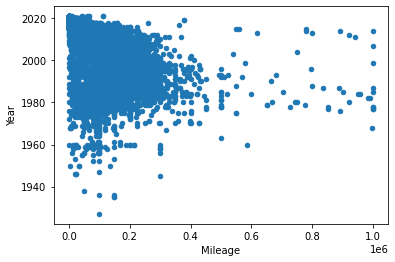

In [44]:
df.plot.scatter(x="Mileage",y="Year")

In [45]:
df[(df["Mileage"]<3000*(2021-df["Year"])) & (df["Condition"]!="New")].count()

Title             1712
Sub_title         1712
Price             1712
Brand             1712
Model             1712
Edition           1294
Year              1712
Condition         1712
Transmission      1712
Body              1592
Fuel              1712
Capacity          1712
Mileage           1712
Location          1712
Description       1712
Post_URL          1712
Seller_name       1712
Seller_type       1712
published_date    1712
dtype: int64

In [46]:
df = df.drop(df[(df["Mileage"]<3000*(2021-df["Year"])) & (df["Condition"]!="New")].index)

In [47]:
df[(df["Mileage"]>400000)].count()

Title             90
Sub_title         90
Price             90
Brand             90
Model             90
Edition           64
Year              90
Condition         90
Transmission      90
Body              83
Fuel              90
Capacity          90
Mileage           90
Location          90
Description       90
Post_URL          90
Seller_name       90
Seller_type       90
published_date    90
dtype: int64

In [48]:
df = df.drop(df[(df["Mileage"]>400000)].index)

The other thing I have considered is outliers that have milages that seem too big compared to the rest. For example, only 1% of the total 18k cars in the data have a mileage greater than 400k. I will consider those outliers and drop them.

In [49]:
df.describe(include="all")

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,17013,17013,1.701300e+04,17013,17013,12441,17013.000000,17013,17013,15262,17013,17013.000000,17013.000000,17013,17013,17013,17013,17013,17013
unique,9358,15334,NaN,53,487,5813,NaN,3,3,7,5,NaN,NaN,197,15444,16150,5449,1,13671
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo",NaN,Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,NaN,NaN,"Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/daihatsu-mira-es-limite...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,181,61,NaN,5339,912,170,NaN,16359,10823,6134,12224,NaN,NaN,1243,138,3,497,17013,67
mean,NaN,NaN,6.478304e+06,NaN,NaN,NaN,2009.129313,NaN,NaN,NaN,NaN,1524.599306,98551.129254,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.757250e+06,NaN,NaN,NaN,9.540611,NaN,NaN,NaN,NaN,745.735451,64503.124594,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.900000e+02,NaN,NaN,NaN,1945.000000,NaN,NaN,NaN,NaN,40.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.400000e+06,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,1000.000000,50000.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.180000e+06,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,1500.000000,86400.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,7.000000e+06,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,1800.000000,135000.000000,NaN,NaN,NaN,NaN,NaN,NaN


<h1>7.The other columns</h1>

There are a few columns that I haven't talked about until now, because I have decided that I am not going to use them for different reasons:
<ul>
    <li>The <b>Title</b> column: I have decided not to use this column because it would be a lot of work to write an algorithm that would extract some valuable information from it that we don't already have in other columns. One example where the title column could have been useful would be in the case of the Edition column that has missing information that could be potentially extracted from the title.</li>
    <li>The <b>Sub_Title</b> and <b>published_date</b> columns both just store the information about when the car was put on sale on the website and wouldn't be useful for predicting the price of the car.</li>
    <li>The <b>Location</b> column just tells us what the location of the seller is, which shouldn't impact the price of a car considering the locations are in the same country.</li>
    <li>The <b>Description</b> column, just like the Title, is too long and it would be hard to extract any valuable information from it, plus it wouldn't be logical to one-hot-encode it.</li>
    <li>The <b>Post_URL</b> just gives us a link to the ad in question</li>
    <li>The <b>Seller_Type</b> could be useful if for example a seller's ad would be pushed to more people than other types of sellers, but in this case every row had Seller_type as Premium-Member, thus being useless for predicting prices.</li>
    <li>Unless the buyer is either racist or xenophobic and could differentiate based on someone's name, the <b>Seller_name</b> column is irelevant to us for predicting the price of a car. It could be argued that a car that was put on sale by a dealership/llc could potentially be sold for a higher price because of potential perks the buyer would have, like a one year warranty or having the assurance that the car is mecanically sound, it would be hard to choose these out of the 6k unique sellers.</li>
</ul>
Based on this, I will not be considering these last columns as features when building a model for predicting the prices of cars

<h1>Selecting the features</h1>

In [50]:
df.dtypes

Title             object
Sub_title         object
Price              int64
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity           int64
Mileage            int64
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

In [51]:
features = ['Brand','Model','Edition','Year','Condition','Transmission','Body','Fuel','Capacity','Mileage']
numeric_features = ['Year','Capacity','Mileage']
nominal_features = ['Brand','Model','Edition','Condition','Transmission','Body','Fuel']

<h1>Create the Test Set</h1>

In [52]:
#Split off the test set: 20% of the dataset
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h1>Dataset Exploration</h1>

In [53]:
#Copy the dev set so we don't mess up the original
copy_df = dev_df.copy()

Plot the scatter matrix to try and find correlation between features in order to be able to find new features

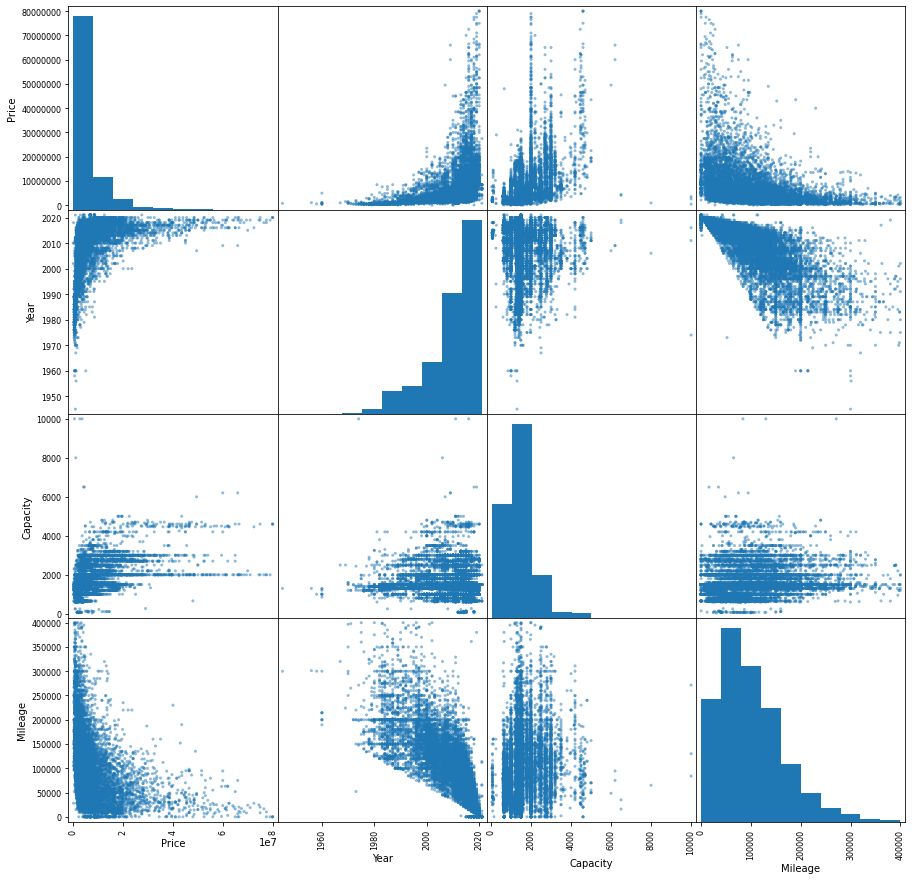

In [54]:
m = scatter_matrix(copy_df, figsize=(15,15))

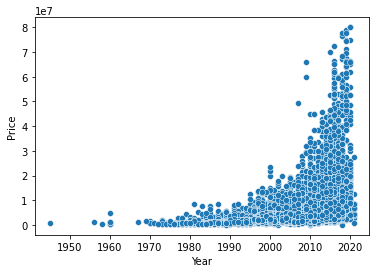

In [55]:
plot = scatterplot(x="Year", y="Price", data=copy_df)

Calculate the correlation between the original numeric features

In [56]:
copy_df.corr()

,Price,Year,Capacity,Mileage
Price,1.000000,0.359510,0.513125,-0.319681
Year,0.359510,1.000000,-0.134241,-0.765745
Capacity,0.513125,-0.134241,1.000000,0.220065
Mileage,-0.319681,-0.765745,0.220065,1.000000


I am trying to find some features that would make sense and that could be predictive of price.

In [57]:
#Insert a new feature called Age that represents the age in years of the cars.
copy_df["Age"] = 2021-copy_df["Year"]+1

In [58]:
copy_df.corr()

,Price,Year,Capacity,Mileage,Age
Price,1.000000,0.359510,0.513125,-0.319681,-0.359510
Year,0.359510,1.000000,-0.134241,-0.765745,-1.000000
Capacity,0.513125,-0.134241,1.000000,0.220065,0.134241
Mileage,-0.319681,-0.765745,0.220065,1.000000,0.765745
Age,-0.359510,-1.000000,0.134241,0.765745,1.000000


In [59]:
#Insert a new feature called MilePerYear that represents the average number of kilometers that particular car has
#traveled every year
copy_df["MilePerYear"] = copy_df["Mileage"]/copy_df["Age"]

In [60]:
copy_df["AgeSquare"] = copy_df["Age"]**2

In [61]:
#Insert a new feature called LogAge that represents the logarithmic value of the Age
#I have inserted this feature because on the scatter matrix Age compared to Price looks like
#an exponential function
copy_df["LogAge"] = np.log(copy_df["Age"])

In [62]:
copy_df["CapacitySquare"] = copy_df["Capacity"]**2

Plot the scatter matrix again and also the correlation matrix to see how good the new features are.

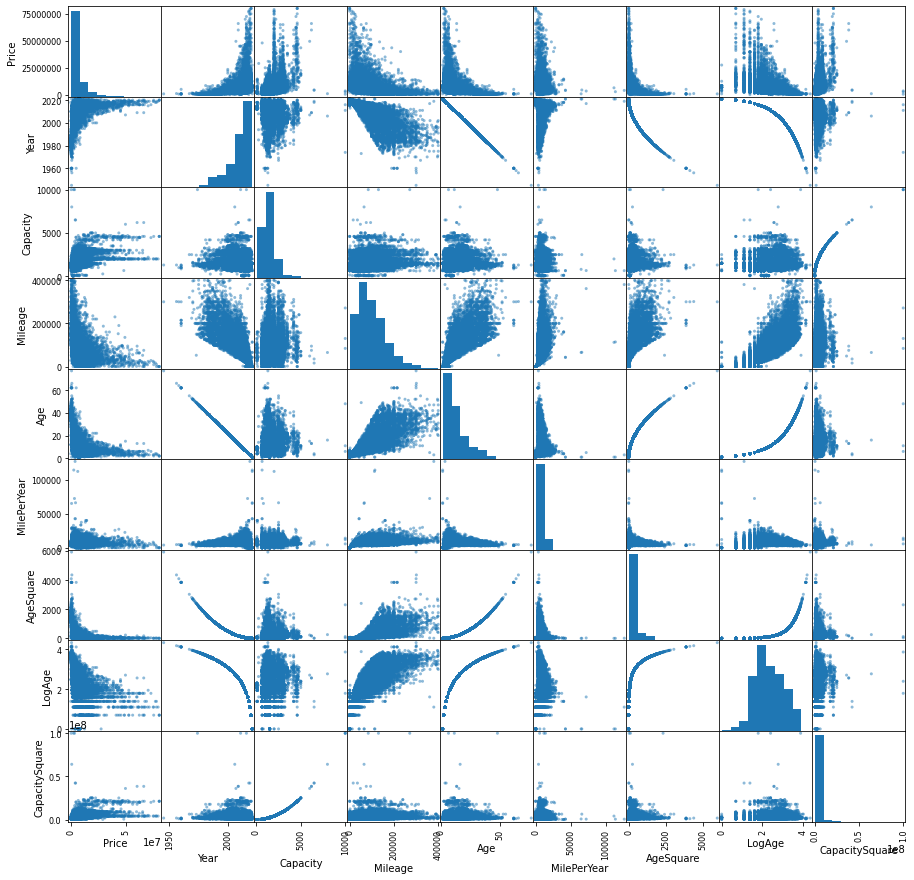

In [63]:
m = scatter_matrix(copy_df, figsize=(15,15))

In [64]:
copy_df.corr()

,Price,Year,Capacity,Mileage,Age,MilePerYear,AgeSquare,LogAge,CapacitySquare
Price,1.000000,0.359510,0.513125,-0.319681,-0.359510,-0.002743,-0.299804,-0.403073,0.477862
Year,0.359510,1.000000,-0.134241,-0.765745,-1.000000,0.234856,-0.953206,-0.930115,-0.072266
Capacity,0.513125,-0.134241,1.000000,0.220065,0.134241,0.058498,0.075156,0.183287,0.922184
Mileage,-0.319681,-0.765745,0.220065,1.000000,0.765745,0.277932,0.665341,0.793942,0.140335
Age,-0.359510,-1.000000,0.134241,0.765745,1.000000,-0.234856,0.953206,0.930115,0.072266
MilePerYear,-0.002743,0.234856,0.058498,0.277932,-0.234856,1.000000,-0.245738,-0.163339,0.049257
AgeSquare,-0.299804,-0.953206,0.075156,0.665341,0.953206,-0.245738,1.000000,0.793103,0.030072
LogAge,-0.403073,-0.930115,0.183287,0.793942,0.930115,-0.163339,0.793103,1.000000,0.113404
CapacitySquare,0.477862,-0.072266,0.922184,0.140335,0.072266,0.049257,0.030072,0.113404,1.000000


Unfortunately, the new features I have come up with don't seem to be that great. They are either not very predictive of the Price, like MilePerYear and AgeSquare while also being quite correlated to other features, or like in the case of LogAge which is somewhat predictive of Price it is also very correlated with the other features. I tried leaving MilePerYear and AgeSquare in, however they slowed my knn regression to a 20 minute halt, so I decided not to use them after all. CapacitySquare was also not chosen when doing knn regression

<h1>Data Preprocessing</h1>

Create the classes that will insert the newly created features, as they are not in the original dataset.

In [65]:
class InsertAge(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["Age"] = 2021-X["Year"]+1
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

class InsertMilePerYear(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["MilePerYear"] = X["Mileage"]/(2021-X["Year"]+1)

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

class InsertAgeSquare(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["AgeSquare"] = (2021-X["Year"]+1)**2

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [66]:
class InsertLogAge(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["LogAge"] = np.log(2021-X["Year"]+1)

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

class InsertCapacitySquare(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["CapacitySquare"] = X["Capacity"]**2

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

I also decided to use multiple transformers in order to try to find a better model in my regression.

In [67]:
class TransformerFromHyperP(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

<h1>Create the preprocessor</h1>

In [68]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("Age", InsertAge()),
                          ("LogAge", InsertLogAge()),
                          #("AgeSquare", InsertAgeSquare()),
                          #("MilePerYear", InsertMilePerYear()),
                          #("CapacitySquare",InsertCapacitySquare()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", TransformerFromHyperP())]), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

<h1>Preparation for Model Selection</h1>

Even after we deleted quite a few rows from the dataset because they were outliers and data that didn't fit our dataset, we still have quite a lot of cars left that we can implement a hold-out strategy for the model building.

In [69]:
#Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

#Target values, converted to a 1D numpy array
dev_y = dev_df["Price"].values
test_y = test_df["Price"].values

In [70]:
#Create the object that shuffles and splits the dev data into 80% training data
#and 20% validation data
ss = ShuffleSplit(n_splits = 1, train_size = 0.75, random_state = 2)

<b>First I try to do kNN regression on the dataset</b>

I tried knn with values for n from 1 to 10 and the optimal value for error estimation was 3, but the training error vs validation error ratio was very bad, the training error was 300k rupees lower than the validation error, meaning we had a very overfitting model. So i tried different values for k that were bigger than 3, in order to find one that minimised the difference between the two. I chose k=6 because even though that made the error bigger, I felt that it was a good compromise between the two. Even though the difference between the training error and validation error is still quite big at over 100k, I couldn't find any more features to change to bring it down.

To try to reduce the overfitting more, I thought it would be a good idea to try to combine the Brand and Model columns as I thought it would reduce the number of columns that would have to be one-hot-encoded from the number of brands+models to the number of models. However, that turned out not to help, and it even made the error 200k worse and didn't help with overfitting at all.

In [71]:
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])
# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [6, 7],
                  "preprocessor__num__Age__insert": [True, False],
                  #"preprocessor__num__CapacitySquare__insert": [True, False],
                  #"preprocessor__num__AgeSquare__insert": [True, False],
                  #"preprocessor__num__MilePerYear__insert": [True, False],
                  "preprocessor__num__LogAge__insert": [True, False],
                  "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 6,
  'preprocessor__num__Age__insert': True,
  'preprocessor__num__LogAge__insert': True,
  'preprocessor__num__scaler__transformer': StandardScaler()},
 -969174.1361053971)

In [72]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  793750.6110838967
Validation error:  969174.1361053971


<b>Second I try to do Ridge Regression to try to furter reduce overfitting</b>

Unless I am doing something wrong, ridge regression doesn't appear to do any better than normal knn regression, so I will probably not choose this model as my final model.

In [73]:
# Create a pipeline that combines the preprocessor with ridge regression
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

# Create a dictionary of hyperparameters for rideg regression
ridge_param_grid = {"preprocessor__num__Age__insert": [True, False],
                    "preprocessor__num__LogAge__insert": [True, False],
                    "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                    "predictor__alpha": [0, 45.0, 50.0, 55.0]}

# Create the grid search object which will find the best hyperparameter values based on validation error
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit
ridge_gs.fit(dev_X, dev_y)

# Let's see how well we did
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 0,
  'preprocessor__num__Age__insert': False,
  'preprocessor__num__LogAge__insert': True,
  'preprocessor__num__scaler__transformer': MinMaxScaler()},
 -1479579.7344147242)

In [74]:
ridge.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridge, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  720816.8472690706
Validation error:  1479579.7344147242


<b>Linear Regression</b>

I prepared my Linear model to be able to test it on the test set at the end.

In [75]:
linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())])
linear_model.fit(dev_X, dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('Age',
                                                                   InsertAge(insert=False)),
                                                                  ('LogAge',
                                                                   InsertLogAge()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   TransformerFromHyperP(transformer=MinMaxScaler()))]),
                                                  ['Year', 'Capacity',
                                                   'Mileage']),
                          

<b>Random Forest Regression</b>

After we had the lecture on decision trees I thought it wouldn't be a bad idea to try to do a random forest model for my regression as well

In [76]:
forestModel = Pipeline([
                ("preprocessor",preprocessor),
                ("predictor", RandomForestRegressor(max_depth=8, random_state=2))
])
forestModel.fit(dev_X, dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('Age',
                                                                   InsertAge(insert=False)),
                                                                  ('LogAge',
                                                                   InsertLogAge()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   TransformerFromHyperP(transformer=MinMaxScaler()))]),
                                                  ['Year', 'Capacity',
                                                   'Mileage']),
                          

<b>Bagging regression</b>

From the same lecture I got the idea of trying to use a bagging regressor as well. I wrote a simple bagging model without a grid search.

In [77]:
baggingModel = Pipeline([
                ("preprocessor",preprocessor),
                ("predictor", BaggingRegressor(random_state=1))
])
baggingModel.fit(dev_X, dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('Age',
                                                                   InsertAge(insert=False)),
                                                                  ('LogAge',
                                                                   InsertLogAge()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   TransformerFromHyperP(transformer=MinMaxScaler()))]),
                                                  ['Year', 'Capacity',
                                                   'Mileage']),
                          

<h1>Evaluate every model on the Test Set</h1>

At this step I will run all my models on the test set that was previously locked away and choose the one that best predicts the prices of cars

Retrain the KNN model on the whole training test(training+validation) and predict on the test set

In [78]:
knn.set_params(**knn_gs.best_params_) 
knn.fit(dev_X, dev_y)
mean_absolute_error(test_y, knn.predict(test_X))

940486.476344402

Retrain the Ridge model on the whole training test(training+validation) and predict on the test set

In [79]:
ridge.set_params(**ridge_gs.best_params_)
ridge.fit(dev_X, dev_y)
mean_absolute_error(test_y, ridge.predict(test_X))

1489522.9203879687

Test the linear model on the test set

In [80]:
mean_absolute_error(test_y, linear_model.predict(test_X))

1500535.8210752697

Test the random forest model on the test set

In [81]:
mean_absolute_error(test_y, forestModel.predict(test_X))

1211191.9543094798

Test the simple bagging model on the test set

In [82]:
mean_absolute_error(test_y,baggingModel.predict(test_X))

870576.5527513071

<h1>Conclusions</h1>

It seems that the bagging model, even though it wasn't a complex implementation of the bagging method performed best, followed up by the knn regression.

<h1>Deploy</h1>
Re-train the "winning" model on the entire dataset and save the model.

In [83]:
baggingModel.fit(df[features], df["Price"].values)
dump(baggingModel, 'models/my_model.pk1')

FileNotFoundError: [Errno 2] No such file or directory: 'models/my_model.pk1'

<h1><center>THE END</h1>